In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sb

In [2]:
hep_data = pd.read_csv('data_hep.csv')

In [3]:
hep_data

,Unnamed: 0,R2,thrustBm,thrustOm,cosTBTO,cosTBz,KSFWVariables__boet__bc,KSFWVariables__bomm2__bc,CleoConeCS__bo1__bc,CleoConeCS__bo2__bc,...,KSFWVariables__bohoo2__cmFS1__bc,KSFWVariables__bohoo3__cmFS1__bc,KSFWVariables__bohoo4__cmFS1__bc,foxWolframR1,foxWolframR2,foxWolframR3,foxWolframR4,thrust,thrustAxisCosTheta,type
0,0,0.152200,0.818042,0.678908,0.925376,0.641596,5.492738,7.326161,0.062815,0.923991,...,-0.000648,-0.000956,0.003297,0.315513,0.257067,0.165595,0.099685,0.766103,0.584374,1
1,1,0.122531,0.847877,0.661546,0.203175,0.960107,3.548602,5.346302,0.000000,2.317477,...,-0.004079,0.000975,-0.010682,0.699070,0.425364,0.337010,0.357491,0.842736,0.960207,1
2,2,0.071109,0.823682,0.659284,0.586194,0.667930,7.739933,-1.734496,0.393218,0.061572,...,-0.002341,-0.002249,-0.000644,0.351783,0.278459,0.247533,0.171277,0.773620,0.723453,1
3,3,0.123307,0.849041,0.713995,0.343100,0.599684,6.336428,5.429208,0.000000,0.000000,...,-0.001151,-0.000096,0.003249,0.616451,0.581567,0.504908,0.313320,0.906921,0.631777,1
4,4,0.128661,0.850345,0.700636,0.598284,0.751411,7.520575,-1.092915,0.105494,0.789670,...,0.004459,-0.001671,-0.000072,0.099653,0.368981,0.190910,0.247606,0.824495,0.589225,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70601,615428,0.341170,0.822778,0.905524,0.744942,0.883310,5.254729,2.711209,0.229089,0.000000,...,0.007728,-0.003148,0.013386,0.240637,0.320524,0.114465,0.172375,0.789952,0.865978,2
70602,1046333,0.431197,0.890331,0.851992,0.979008,0.270003,10.016900,-1.206864,0.000000,4.097687,...,0.063099,-0.006214,0.009684,0.254839,0.436554,0.169985,0.252282,0.861856,-0.084869,2
70603,772073,0.345012,0.897968,0.745580,0.974656,0.691979,8.154435,-0.880221,4.716620,1.190169,...,0.026411,0.000968,0.004867,0.089218,0.603980,0.223313,0.441302,0.903512,0.689248,2
70604,1418852,0.240343,0.910267,0.698762,0.960566,0.441567,9.145159,-9.401502,2.592608,0.548217,...,0.020226,-0.006749,0.021568,0.406443,0.524733,0.335748,0.384065,0.868288,-0.230441,2


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Cleaning and Preprocessing
# Dropping the 'Unnamed: 0' column
hep_data_cleaned = hep_data.drop(columns=['Unnamed: 0'])

# Checking for missing values
missing_values = hep_data_cleaned.isnull().sum()

# 2. Exploratory Data Analysis (EDA)
# Distribution of the 'type' column (Flag)
flag_distribution = hep_data_cleaned['type'].value_counts()

# Display missing values and flag distribution
missing_values, flag_distribution

(R2                                   0
 thrustBm                             0
 thrustOm                             0
 cosTBTO                              0
 cosTBz                               0
 KSFWVariables__boet__bc              0
 KSFWVariables__bomm2__bc             0
 CleoConeCS__bo1__bc                  0
 CleoConeCS__bo2__bc                  0
 CleoConeCS__bo3__bc                  0
 CleoConeCS__bo4__bc                  0
 CleoConeCS__bo5__bc                  0
 CleoConeCS__bo6__bc                  0
 CleoConeCS__bo7__bc                  0
 CleoConeCS__bo8__bc                  0
 CleoConeCS__bo9__bc                  0
 CleoConeCS__bo1__cmROE__bc           0
 CleoConeCS__bo2__cmROE__bc           0
 CleoConeCS__bo3__cmROE__bc           0
 CleoConeCS__bo4__cmROE__bc           0
 CleoConeCS__bo5__cmROE__bc           0
 CleoConeCS__bo6__cmROE__bc           0
 CleoConeCS__bo7__cmROE__bc           0
 CleoConeCS__bo8__cmROE__bc           0
 CleoConeCS__bo9__cmROE__bc           0


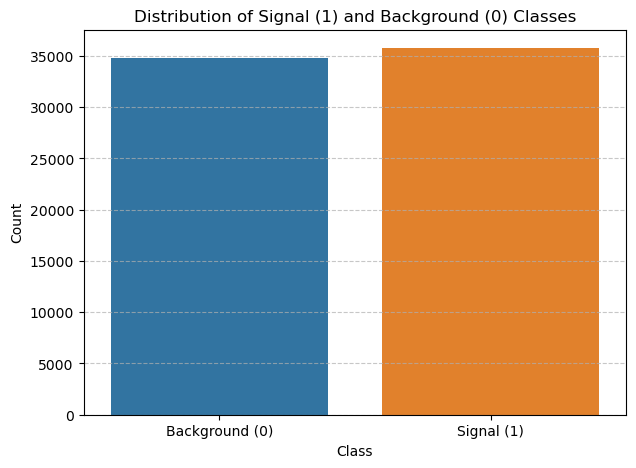

In [5]:
# lets create a column where the flags with 1 and 0 are labelled 1 and flags with rest of the numbers are labelled 0 

# Creating the 'label' column for binary classification
hep_data_cleaned['label'] = hep_data_cleaned['type'].apply(lambda x: 1 if x in [0, 1] else 0)

# Checking the distribution of the Signal and Background classes
class_distribution = hep_data_cleaned['label'].value_counts(normalize=True)


import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing the distribution of the Signal and Background classes
plt.figure(figsize=(7, 5))
sns.countplot(x='label', data=hep_data_cleaned)
plt.title('Distribution of Signal (1) and Background (0) Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Background (0)', 'Signal (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [6]:
hep_data_cleaned

,R2,thrustBm,thrustOm,cosTBTO,cosTBz,KSFWVariables__boet__bc,KSFWVariables__bomm2__bc,CleoConeCS__bo1__bc,CleoConeCS__bo2__bc,CleoConeCS__bo3__bc,...,KSFWVariables__bohoo3__cmFS1__bc,KSFWVariables__bohoo4__cmFS1__bc,foxWolframR1,foxWolframR2,foxWolframR3,foxWolframR4,thrust,thrustAxisCosTheta,type,label
0,0.152200,0.818042,0.678908,0.925376,0.641596,5.492738,7.326161,0.062815,0.923991,1.262607,...,-0.000956,0.003297,0.315513,0.257067,0.165595,0.099685,0.766103,0.584374,1,1
1,0.122531,0.847877,0.661546,0.203175,0.960107,3.548602,5.346302,0.000000,2.317477,0.000000,...,0.000975,-0.010682,0.699070,0.425364,0.337010,0.357491,0.842736,0.960207,1,1
2,0.071109,0.823682,0.659284,0.586194,0.667930,7.739933,-1.734496,0.393218,0.061572,2.128880,...,-0.002249,-0.000644,0.351783,0.278459,0.247533,0.171277,0.773620,0.723453,1,1
3,0.123307,0.849041,0.713995,0.343100,0.599684,6.336428,5.429208,0.000000,0.000000,2.233941,...,-0.000096,0.003249,0.616451,0.581567,0.504908,0.313320,0.906921,0.631777,1,1
4,0.128661,0.850345,0.700636,0.598284,0.751411,7.520575,-1.092915,0.105494,0.789670,2.863936,...,-0.001671,-0.000072,0.099653,0.368981,0.190910,0.247606,0.824495,0.589225,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70601,0.341170,0.822778,0.905524,0.744942,0.883310,5.254729,2.711209,0.229089,0.000000,0.411111,...,-0.003148,0.013386,0.240637,0.320524,0.114465,0.172375,0.789952,0.865978,2,0
70602,0.431197,0.890331,0.851992,0.979008,0.270003,10.016900,-1.206864,0.000000,4.097687,2.356474,...,-0.006214,0.009684,0.254839,0.436554,0.169985,0.252282,0.861856,-0.084869,2,0
70603,0.345012,0.897968,0.745580,0.974656,0.691979,8.154435,-0.880221,4.716620,1.190169,1.030242,...,0.000968,0.004867,0.089218,0.603980,0.223313,0.441302,0.903512,0.689248,2,0
70604,0.240343,0.910267,0.698762,0.960566,0.441567,9.145159,-9.401502,2.592608,0.548217,3.795009,...,-0.006749,0.021568,0.406443,0.524733,0.335748,0.384065,0.868288,-0.230441,2,0


In [7]:
# lets create the test and train data and then proceed with the model selection 
# for the test data , I am keeping everything except the type and label data 
# for training I am using only label data 

from sklearn.model_selection import train_test_split

# 1. Data Preparation
X = hep_data_cleaned.drop(columns=['type', 'label'])  # Features
y = hep_data_cleaned['label']  # Target variable

# 2. Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Displaying the dimensions of the training and test sets
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


((56484, 59), (14122, 59), (56484,), (14122,))

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# 3. Choosing a Model
rf_clf = RandomForestClassifier(random_state=42)

# 4. Training the Model
rf_clf.fit(X_train, y_train)

# 5. Evaluating the Model
y_pred = rf_clf.predict(X_test)
y_pred_proba = rf_clf.predict_proba(X_test)[:, 1]

# Displaying evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_proba))


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.86      6969
           1       0.85      0.88      0.86      7153

    accuracy                           0.86     14122
   macro avg       0.86      0.86      0.86     14122
weighted avg       0.86      0.86      0.86     14122

AUC-ROC: 0.9313026370683919


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.pipeline import Pipeline

# Load the data
file_path = 'data_hep.csv'
hep_data = pd.read_csv(file_path)

# Data Cleaning and Preprocessing
hep_data_cleaned = hep_data.drop(columns=['Unnamed: 0'])
hep_data_cleaned['label'] = hep_data_cleaned['type'].apply(lambda x: 1 if x in [0, 1] else 0)
X = hep_data_cleaned.drop(columns=['type', 'label'])  # Features
y = hep_data_cleaned['label']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Defining classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

# Defining dimensionality reduction techniques
dim_reduction_techniques = {
    'LDA': LinearDiscriminantAnalysis(n_components=1),
    'PCA': PCA(n_components=5),
    'SVD': TruncatedSVD(n_components=5)
}

# Applying dimensionality reduction and training classifiers
for dr_name, dr_technique in dim_reduction_techniques.items():
    for clf_name, clf in classifiers.items():
        # Creating a pipeline
        pipeline = Pipeline([(dr_name, dr_technique), (clf_name, clf)])
        
        # Training the model
        pipeline.fit(X_train, y_train)
        
        # Making predictions
        y_pred = pipeline.predict(X_test)
        y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
        
        # Evaluating the model
        print(f"Model: {clf_name} with {dr_name}")
        print("Classification Report:\n", classification_report(y_test, y_pred))
        print("AUC-ROC:", roc_auc_score(y_test, y_pred_proba))
        print("="*50)


Model: Random Forest with LDA
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.77      0.77      6969
           1       0.77      0.77      0.77      7153

    accuracy                           0.77     14122
   macro avg       0.77      0.77      0.77     14122
weighted avg       0.77      0.77      0.77     14122

AUC-ROC: 0.8649056995974884
Model: Logistic Regression with LDA
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.82      0.83      6969
           1       0.83      0.86      0.84      7153

    accuracy                           0.84     14122
   macro avg       0.84      0.84      0.84     14122
weighted avg       0.84      0.84      0.84     14122

AUC-ROC: 0.913414436648474
Model: SVM with LDA
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.81      0.83      6969
           1       0.82 

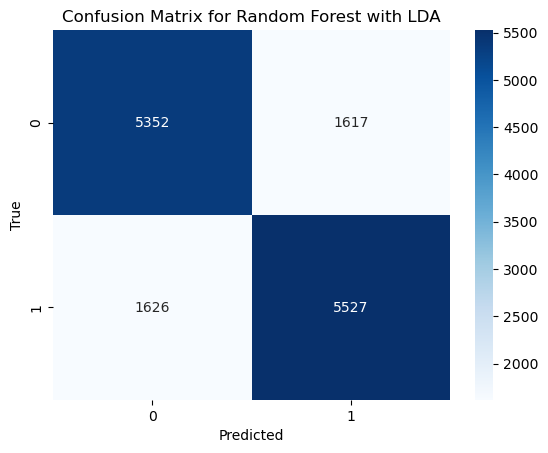

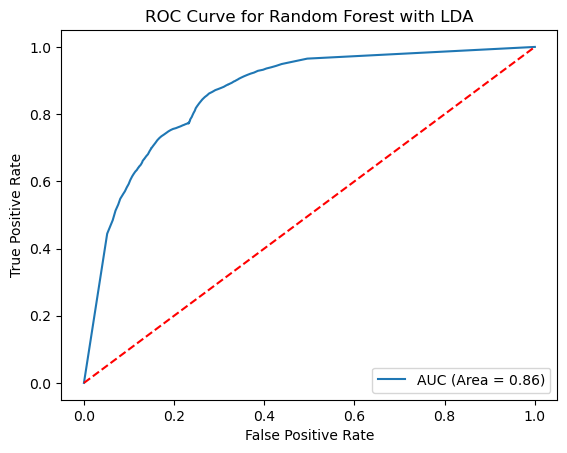

Model: Random Forest with LDA
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.77      0.77      6969
           1       0.77      0.77      0.77      7153

    accuracy                           0.77     14122
   macro avg       0.77      0.77      0.77     14122
weighted avg       0.77      0.77      0.77     14122

AUC-ROC: 0.8649056995974884


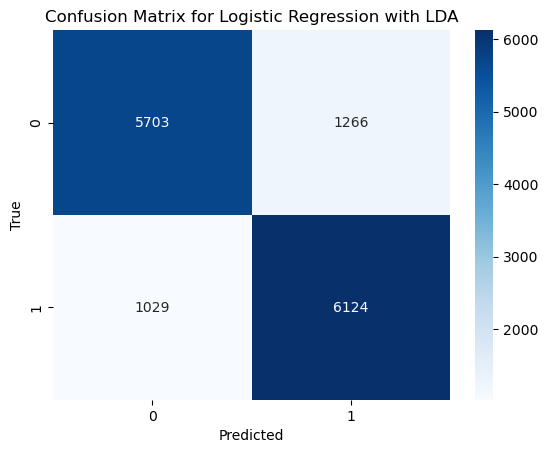

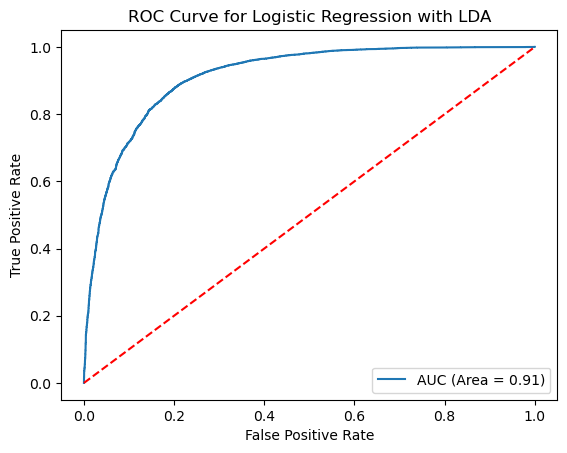

Model: Logistic Regression with LDA
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.82      0.83      6969
           1       0.83      0.86      0.84      7153

    accuracy                           0.84     14122
   macro avg       0.84      0.84      0.84     14122
weighted avg       0.84      0.84      0.84     14122

AUC-ROC: 0.913414436648474


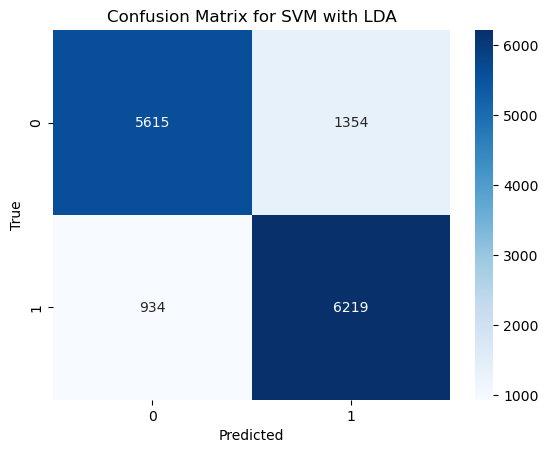

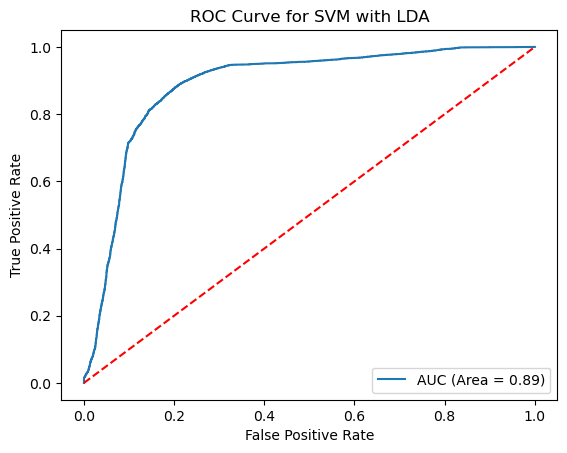

Model: SVM with LDA
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.81      0.83      6969
           1       0.82      0.87      0.84      7153

    accuracy                           0.84     14122
   macro avg       0.84      0.84      0.84     14122
weighted avg       0.84      0.84      0.84     14122

AUC-ROC: 0.8866207875475456


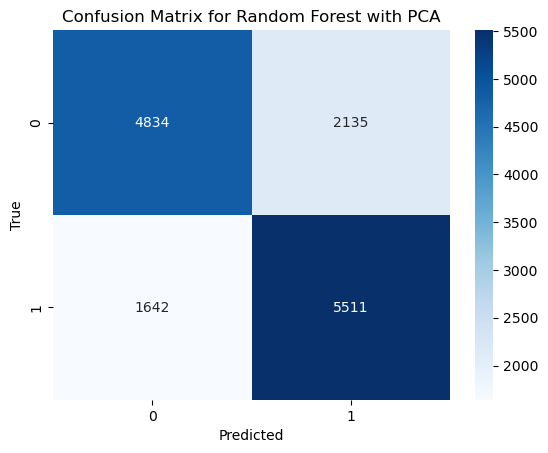

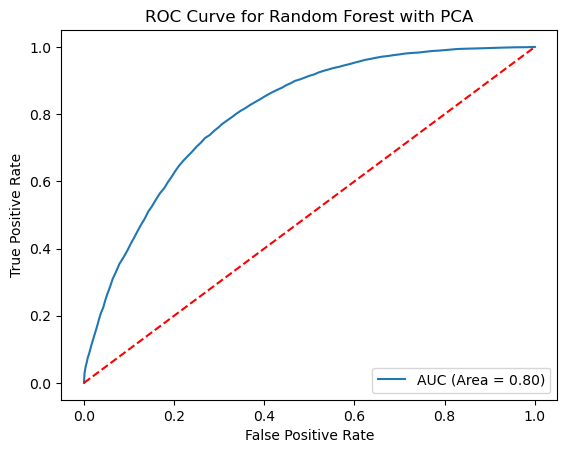

Model: Random Forest with PCA
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.69      0.72      6969
           1       0.72      0.77      0.74      7153

    accuracy                           0.73     14122
   macro avg       0.73      0.73      0.73     14122
weighted avg       0.73      0.73      0.73     14122

AUC-ROC: 0.8038901863672713


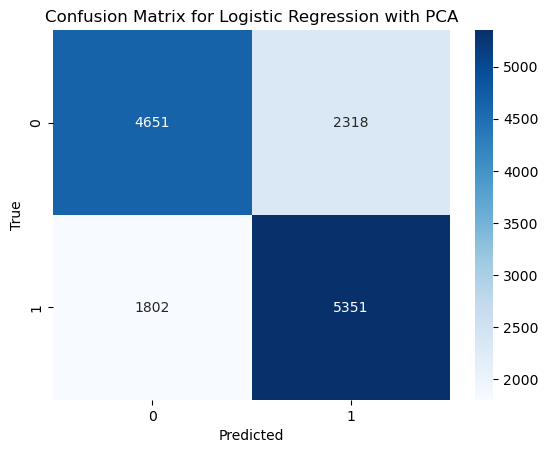

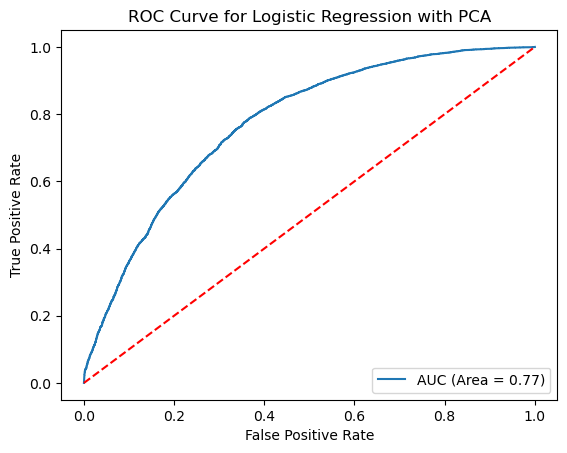

Model: Logistic Regression with PCA
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.67      0.69      6969
           1       0.70      0.75      0.72      7153

    accuracy                           0.71     14122
   macro avg       0.71      0.71      0.71     14122
weighted avg       0.71      0.71      0.71     14122

AUC-ROC: 0.7729528847340693


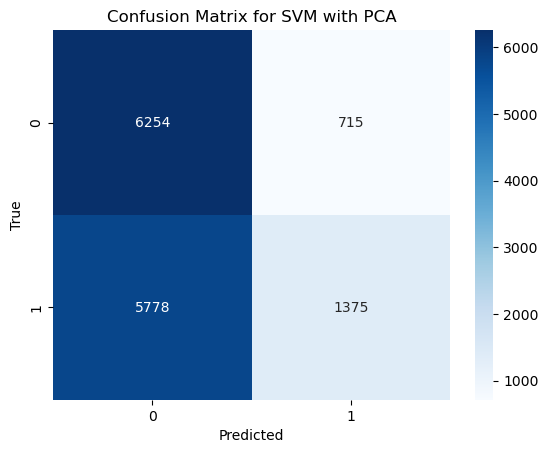

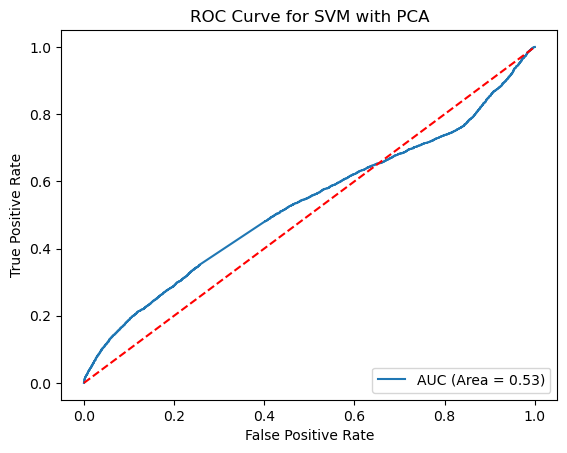

Model: SVM with PCA
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.90      0.66      6969
           1       0.66      0.19      0.30      7153

    accuracy                           0.54     14122
   macro avg       0.59      0.54      0.48     14122
weighted avg       0.59      0.54      0.48     14122

AUC-ROC: 0.5305271149778621


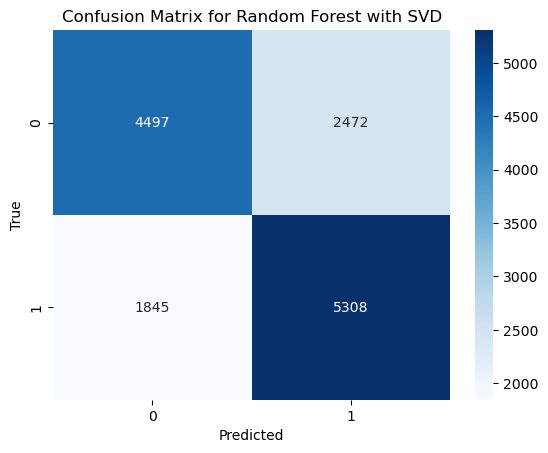

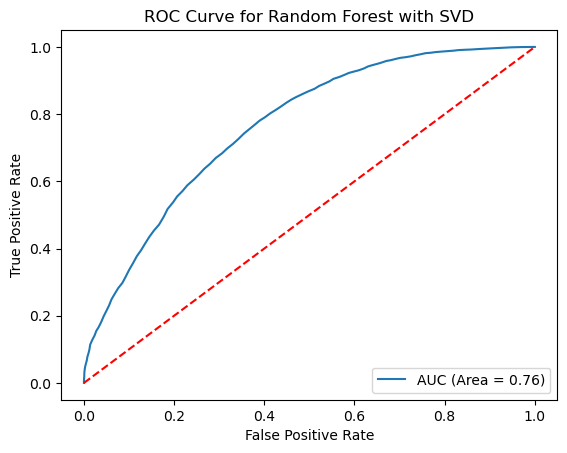

Model: Random Forest with SVD
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.65      0.68      6969
           1       0.68      0.74      0.71      7153

    accuracy                           0.69     14122
   macro avg       0.70      0.69      0.69     14122
weighted avg       0.70      0.69      0.69     14122

AUC-ROC: 0.7648013790857504


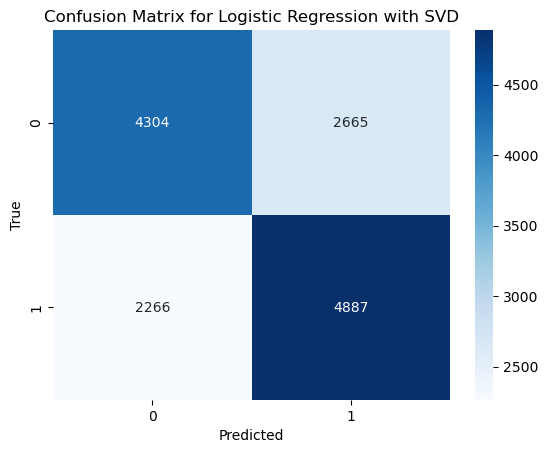

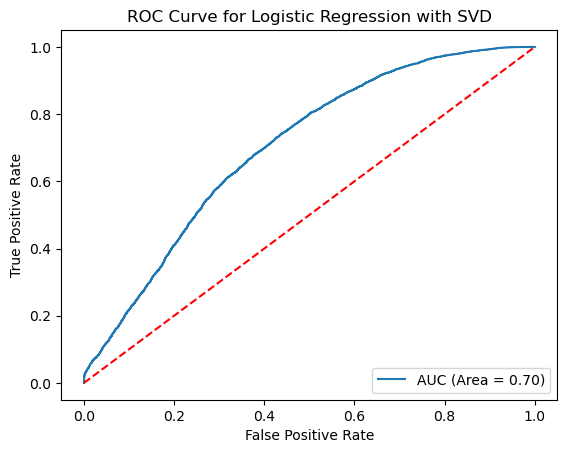

Model: Logistic Regression with SVD
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.62      0.64      6969
           1       0.65      0.68      0.66      7153

    accuracy                           0.65     14122
   macro avg       0.65      0.65      0.65     14122
weighted avg       0.65      0.65      0.65     14122

AUC-ROC: 0.7013857398115282


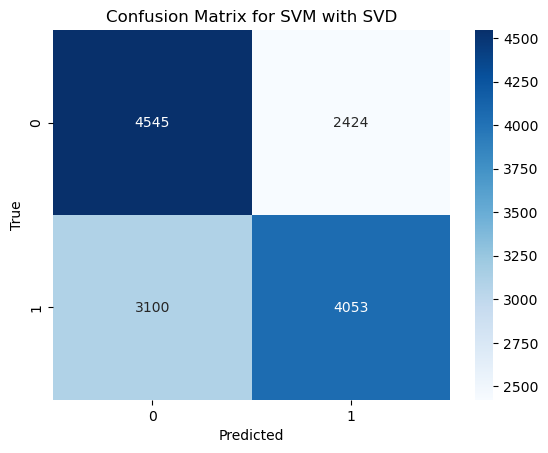

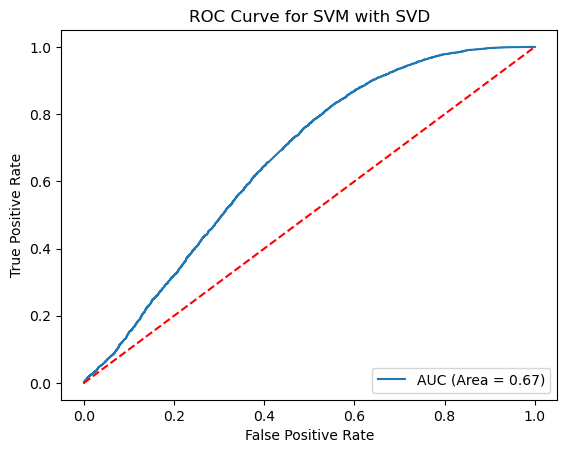

Model: SVM with SVD
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.65      0.62      6969
           1       0.63      0.57      0.59      7153

    accuracy                           0.61     14122
   macro avg       0.61      0.61      0.61     14122
weighted avg       0.61      0.61      0.61     14122

AUC-ROC: 0.6666191835116019


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve
from sklearn.pipeline import Pipeline
import seaborn as sns

# Load the data
file_path = 'data_hep.csv'
hep_data = pd.read_csv(file_path)

# Data Cleaning and Preprocessing
hep_data_cleaned = hep_data.drop(columns=['Unnamed: 0'])
hep_data_cleaned['label'] = hep_data_cleaned['type'].apply(lambda x: 1 if x in [0, 1] else 0)
X = hep_data_cleaned.drop(columns=['type', 'label'])  # Features
y = hep_data_cleaned['label']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Defining classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

# Defining dimensionality reduction techniques
dim_reduction_techniques = {
    'LDA': LinearDiscriminantAnalysis(n_components=1),
    'PCA': PCA(n_components=5),
    'SVD': TruncatedSVD(n_components=5)
}

# Applying dimensionality reduction and training classifiers
for dr_name, dr_technique in dim_reduction_techniques.items():
    for clf_name, clf in classifiers.items():
        # Creating a pipeline
        pipeline = Pipeline([(dr_name, dr_technique), (clf_name, clf)])
        
        # Training the model
        pipeline.fit(X_train, y_train)
        
        # Making predictions
        y_pred = pipeline.predict(X_test)
        y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
        
        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix for {clf_name} with {dr_name}')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()
        
        # ROC Curve
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
        plt.plot(fpr, tpr, label=f'AUC (Area = {roc_auc_score(y_test, y_pred_proba):.2f})')
        plt.plot([0, 1], [0, 1], 'r--')
        plt.title(f'ROC Curve for {clf_name} with {dr_name}')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')
        plt.show()
        
        # Evaluating the model
        print(f"Model: {clf_name} with {dr_name}")
        print("Classification Report:\n", classification_report(y_test, y_pred))
        print("AUC-ROC:", roc_auc_score(y_test, y_pred_proba))
        print("="*50)
